<a href="https://colab.research.google.com/github/Rhythm1821/CNN-Image-Classification/blob/main/DeepCNNImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Get the data

### 1.1 Import dependencies

In [90]:
import requests, zipfile
from zipfile import ZipFile
from pathlib import Path
import cv2,os,imghdr
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
device = 'cuda' if tf.test.is_gpu_available() else 'cpu'
device

'cuda'

### 1.2 Import data

In [91]:
data_path = Path('data/')
happy_path = Path(data_path / 'happy')
sad_path = Path(data_path / 'sad')

if happy_path.is_dir():
  print(f'{happy_path} path already exists')
else:
  print(f'Creating {happy_path} path')
  happy_path.mkdir(parents=True,exist_ok=True)

with open('Happy.zip','wb') as f:
  url = 'https://github.com/Rhythm1821/Colab-Project-Data/raw/main/image-classification/Happy.zip' #change the url from
  request = requests.get(url)
  f.write(request.content)

with ZipFile('Happy.zip','r') as zip_file:
  print('unzipping the data')
  zip_file.extractall(happy_path)

with open('Sad.zip','wb') as f:
  url = 'https://github.com/Rhythm1821/Colab-Project-Data/raw/main/image-classification/Sad.zip'
  request = requests.get(url)
  f.write(request.content)

with ZipFile('Sad.zip','r') as zip_file:
  print('unzipping the data')
  zip_file.extractall(sad_path)

data/happy path already exists
unzipping the data
unzipping the data


In [92]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its content"""
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f'There are {len(dirname)} directories and {len(filename)} images in {dirpath}')

walk_through_dir(data_path)

There are 2 directories and 0 images in data
There are 0 directories and 246 images in data/happy
There are 0 directories and 226 images in data/sad


### 1.3 Remove dodgy images

In [93]:
img_exts = ['jpeg','jpg','png','bmp']

In [94]:
for image_class in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path, image_class)):
        image_path = os.path.join(data_path, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/happy/stock-photo-collage-of-portrait-of-many-smiling-faces-277752143.jpg
Image not in ext list data/happy/vector9.svg
Image not in ext list data/happy/appy-people-a-group-of-teenagers-looking-down-with-a-happy-smile-on-his-face.jpg
Image not in ext list data/happy/vector.svg
Image not in ext list data/happy/vector4.svg
Image not in ext list data/happy/vector10.svg
Image not in ext list data/happy/depositphotos_124529770-stock-photo-happy-faces-collage.jpg
Image not in ext list data/happy/stock-photo-collage-of-people-portraits-of-smiling-faces-293088155.jpg
Image not in ext list data/happy/vector13.svg
Image not in ext list data/happy/faces_were_perceived_as_younger_than_neutral_above_but_neu-a-4_1432229758651.jpg
Image not in ext list data/happy/65647168.jpg
Image not in ext list data/happy/g-faces-of-people-happy-men-and-women-expressing-different-positive-emotions.jpg
Image not in ext list data/happy/vector5.svg
Image not in ext list data/happy/happy-home

In [95]:
os.listdir(os.path.join(data_path,'happy'))

['shutterstock_118972231.png',
 'image15.png',
 'image11.jpeg',
 'happyface-sadface-by-Pixabay-and-RyanMcGuire-1024.jpg',
 'beautiful-smiling-faces-people-happy-young-family-from-three-persons_186202-8747.jpg',
 'happy-people-faces-set-set-happy-laughing-people-smiling-faces-collection-142561251.jpg',
 'images19.jpg',
 'people-with-happy-faces-drawing_csp43106995.png',
 'images26.jpg',
 'of-people-happy-men-and-women-expressing-different-positive-emotions-2BRYC92.png',
 '1000_F_477957059_TgOs5ZDJWJL1U8kDECNpohJa22Q4qhxR.jpg',
 'image12.jpeg',
 'happy-people-faces-set-set-of-happy-laughing-people-smiling-faces-collection-picture_csp67233111.jpg',
 'images22.jpg',
 'images20.jpg',
 'portraits-young-diverse-people-grimacing-gesturing-colorful-studio-144897299.png',
 'happy-2191132_1280.png',
 'image.jpeg',
 'images12.jpg',
 'From-left-to-right-the-1st-row-shows-happy-faces-of-young-woman-young-man-middle-aged.png',
 'images13.jpg',
 'image24.jpeg',
 'portrait-of-young-people-with-surprise

In [96]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    image_sizes = {}

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(happy_path, file_name)

            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Get the size of the image
                    width, height = img.size
                    file_size = os.path.getsize(file_path)

                    if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                        os.remove(file_path)
                        print(f"Removed {file_name} - Size: {file_size} bytes")
                    else:
                        image_sizes[file_name] = (width, height)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return image_sizes

# Provide the path to the folder containing the images
folder_path = '/content/data/happy'
image_sizes = get_image_sizes(folder_path)

# Display the image sizes
for file_name, size in image_sizes.items():
    print(f"{file_name}: {size[0]}x{size[1]}")


Removed image11.jpeg - Size: 4266 bytes
Removed images26.jpg - Size: 7667 bytes
Removed image12.jpeg - Size: 3063 bytes
Removed images20.jpg - Size: 6967 bytes
Removed image.jpeg - Size: 5831 bytes
Removed image24.jpeg - Size: 5575 bytes
Removed image3.jpeg - Size: 2559 bytes
Removed image25.jpeg - Size: 6077 bytes
Removed image6.jpeg - Size: 2518 bytes
Removed image2.jpeg - Size: 5881 bytes
Removed AGvuzYZVi5jDA5tSL2IkzR2OVn2EWWzMkXl8tds6DVjUs64-c-mo.jpg - Size: 739 bytes
Removed images9.jpg - Size: 6934 bytes
Removed image9.jpeg - Size: 3577 bytes
Removed image30.jpeg - Size: 6459 bytes
Removed image31.jpeg - Size: 7230 bytes
Removed images6.jpg - Size: 8652 bytes
Removed images.jpg - Size: 1800 bytes
Removed image10.jpeg - Size: 4064 bytes
Removed image8.jpeg - Size: 4717 bytes
Removed images21.jpg - Size: 8214 bytes
Removed image4.jpeg - Size: 3322 bytes
Removed images24.jpg - Size: 6708 bytes
Removed images4.jpg - Size: 3105 bytes
Removed 368a2a55887be8795c17a2fac55e65b4--happy-fa

In [97]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    image_sizes = {}

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(sad_path, file_name)

            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Get the size of the image
                    width, height = img.size
                    file_size = os.path.getsize(file_path)

                    if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                        os.remove(file_path)
                        print(f"Removed {file_name} - Size: {file_size} bytes")
                    else:
                        image_sizes[file_name] = (width, height)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return image_sizes

# Provide the path to the folder containing the images
folder_path = '/content/data/sad'
image_sizes = get_image_sizes(folder_path)

# Display the image sizes
for file_name, size in image_sizes.items():
    print(f"{file_name}: {size[0]}x{size[1]}")


Removed image11.jpeg - Size: 4588 bytes
Removed images19.jpg - Size: 3645 bytes
Removed image12.jpeg - Size: 3705 bytes
Removed images20.jpg - Size: 6261 bytes
Removed image.jpeg - Size: 1443 bytes
Removed images12.jpg - Size: 9347 bytes
Removed images13.jpg - Size: 7309 bytes
Removed image24.jpeg - Size: 5147 bytes
Removed image3.jpeg - Size: 4506 bytes
Removed image25.jpeg - Size: 4542 bytes
Removed image6.jpeg - Size: 3606 bytes
Removed image20.jpeg - Size: 4926 bytes
Removed image21.jpeg - Size: 6271 bytes
Removed image2.jpeg - Size: 2191 bytes
Removed images15.jpg - Size: 4611 bytes
Removed AGvuzYZVi5jDA5tSL2IkzR2OVn2EWWzMkXl8tds6DVjUs64-c-mo.jpg - Size: 739 bytes
Removed images9.jpg - Size: 3040 bytes
Removed image9.jpeg - Size: 3180 bytes
Removed image30.jpeg - Size: 5288 bytes
Removed images6.jpg - Size: 7094 bytes
Removed images.jpg - Size: 8214 bytes
Removed image18.jpeg - Size: 5742 bytes
Removed image10.jpeg - Size: 3621 bytes
Removed image8.jpeg - Size: 2377 bytes
Removed 

In [98]:

def check_image_sizes(folder_path,file_path):
    small_images = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = file_path

            try:
                # Get the size of the image
                file_size = os.path.getsize(file_path)

                if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                    small_images.append(file_name)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return small_images

In [99]:
# Provide the path to the folder containing the images
file_path = os.path.join(sad_path, file_name)
folder_path = '/content/data/sad'
small_images = check_image_sizes(folder_path,file_path)

if small_images:
    print("The following images are less than 10KB in sad folder:")
    for image in small_images:
        print(image)
else:
    print("No images found with a size less than 10KB in sad folder.")

No images found with a size less than 10KB in sad folder.


In [100]:
import os

def check_image_sizes(folder_path):
    small_images = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(happy_path, file_name)

            try:
                # Get the size of the image
                file_size = os.path.getsize(file_path)

                if file_size < 10240:  # Size less than 10KB (10KB = 10240 bytes)
                    small_images.append(file_name)
                    # print(file_name)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return small_images

# Provide the path to the folder containing the images
folder_path = '/content/data/happy'
small_images = check_image_sizes(folder_path)

if small_images:
    print("The following images are less than 10KB:")
    for image in small_images:
        print(image)
else:
    print("No images found with a size less than 10KB.")


No images found with a size less than 10KB.


In [101]:
img = cv2.imread(os.path.join('data','happy','Happy-Face-4e0f88e7e2275_hires.jpg'))

(-0.5, 2122.5, 2499.5, -0.5)

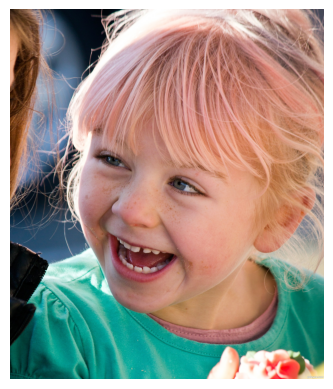

In [102]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis(False)

In [103]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 324 files belonging to 2 classes.


In [104]:
data_iterator = data.as_numpy_iterator() #helpful when using very large dataset
data_iterator

In [118]:
batch = data_iterator.next()
batch

(array([[[[ 29.1875   ,  29.1875   ,  29.1875   ],
          [ 24.       ,  24.       ,  24.       ],
          [ 15.6875   ,  15.6875   ,  15.6875   ],
          ...,
          [ 28.9375   ,  28.9375   ,  28.9375   ],
          [ 33.25     ,  33.25     ,  33.25     ],
          [ 39.3125   ,  39.3125   ,  39.3125   ]],
 
         [[ 13.1875   ,  13.1875   ,  13.1875   ],
          [ 19.5      ,  19.5      ,  19.5      ],
          [ 16.5      ,  16.5      ,  16.5      ],
          ...,
          [ 18.6875   ,  18.6875   ,  18.6875   ],
          [ 30.75     ,  30.75     ,  30.75     ],
          [ 36.6875   ,  36.6875   ,  36.6875   ]],
 
         [[ 15.5      ,  15.5      ,  15.5      ],
          [ 12.25     ,  12.25     ,  12.25     ],
          [ 17.625    ,  17.625    ,  17.625    ],
          ...,
          [ 14.1875   ,  14.1875   ,  14.1875   ],
          [ 29.5      ,  29.5      ,  29.5      ],
          [ 36.5      ,  36.5      ,  36.5      ]],
 
         ...,
 
         [[ 

In [119]:
# 0 for happy
# 1 for sad
batch[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

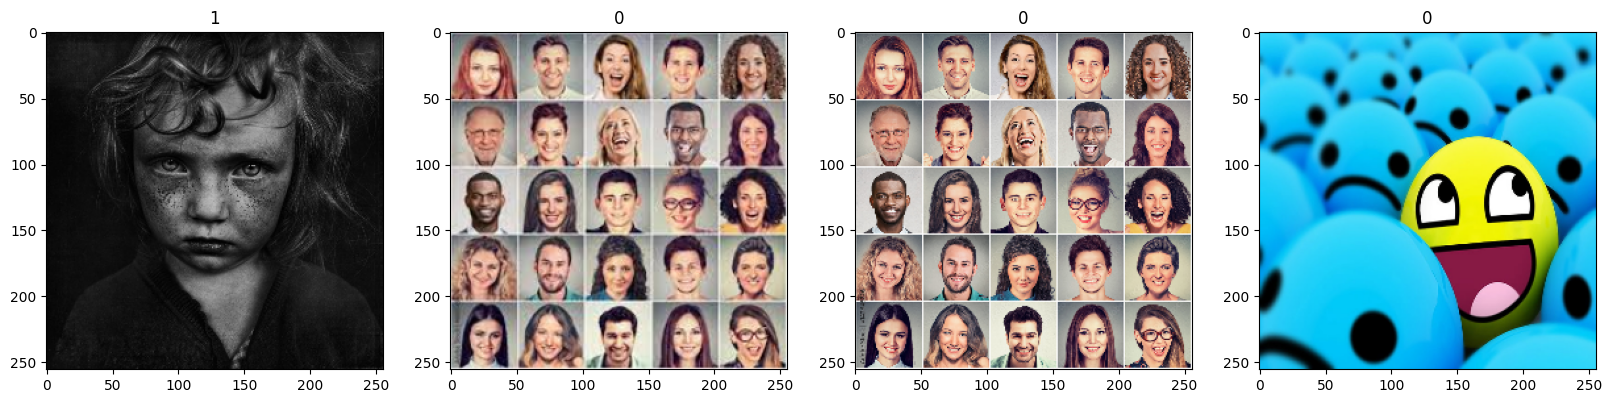

In [120]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

## 2 Preprocess data

### 2.1 Scale the data

In [121]:
data = data.map(lambda x,y: (x/255,y))

In [129]:
scaled_iterator = data.as_numpy_iterator()

In [131]:
batch = scaled_iterator.next()

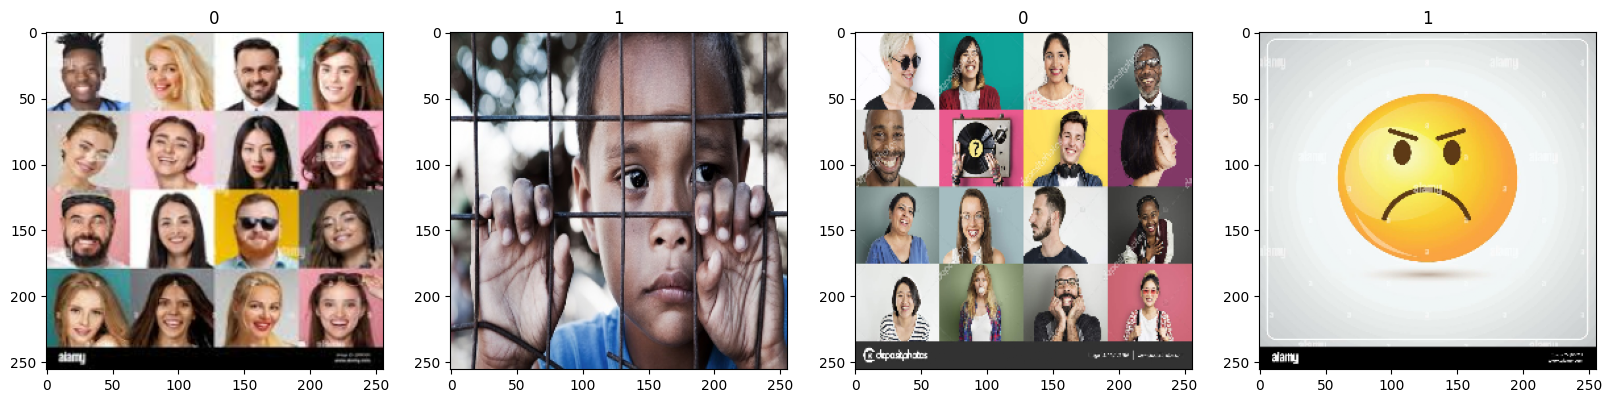

In [133]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [136]:
batch[0].min(),batch[0].max()

(0.0, 1.0)

### 2.2 Split the data

In [139]:
#check total batches
len(data)

11

In [152]:
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.1) + 1
validation_size = int(len(data) * 0.2)

In [155]:
print(train_size+test_size+validation_size)

11


In [158]:
train = data.take(train_size)
val = data.skip(train_size).take(validation_size)
test = data.skip(train_size+validation_size).take(test_size)

In [160]:
len(train),len(test),len(val)

(7, 2, 2)

## 3 Deep learning model